Contrairement à la France, les Américains n’ont pas l’équivalent de notre Sécurité Sociale (française). L’immense majorité souscrit à des assurances privées qui couvrent les risques liés à leur santé. Ce qui représente pour chaque américain un budget conséquent au sein du ménage. En effet, les factures médicales sont la première raison de banqueroute personnelle. A cela, s'ajoutent de nouvelles données indiquant que la part d’Américains obèses a bondi de 6% en 10 ans. Selon une étude publiée le 23 mars 2018 dans le Journal of the American Medical Association (JAMA), près de 40% des Américains de plus de 20 ans étaient obèses en 2016 contre 34% en 2007.

Pour parvenir à ces résultats, les auteurs de l’étude - des chercheurs des Centres de contrôle et de prévention des maladies (CDC) - ont comparé les données de plus de 43.000 Américains recueillies via des questionnaires entre 2007 et 2008 par rapport à celles collectées entre 2015 et 2016.

L'état américain dépense chaque année 215 milliards de dollars dans le secteur de la santé uniquement en ce qui concerne l’obésité.  Cependant, tout le monde n'en bénéficie pas forcément. Donc, nous allons vérifier si une certaine catégorie de la population américaine dépense davantage pour une couverture santé.

# 1. Importer les librairies

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 2. Charger le fichier

In [2]:
# charger le fichier csv (fichier "insurance.csv" téléchargé à partir du site Kaggle)
dataset = pd.read_csv("insurance.csv")

# 3. Analyse exploratoire

In [3]:
# Afficher les données
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Dictionnaire :  
bmi = body mass index ou Indice de Masse Corporelle (IMC), permet d’estimer si une personne est trop maigre, si son poids est normal, si elle est en surpoids ou obèse.
children = enfant; smoker = fumeur; region = Nord Ouest, sud Ouest, Sud Est; charges = montant dépensé en dollars.

In [4]:
# Pour afficher le type de données
dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

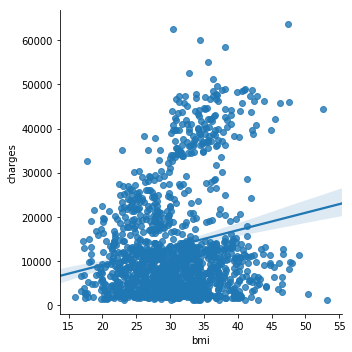

In [5]:
# Visualisation exploratoire avec Seaborn
sns.lmplot(x="bmi",y="charges", data = dataset)

#sns.lmplot(x="age",y="charges", data = dataset)
#sns.lmplot(x="smoker",y="charges", data = dataset)
#sns.lmplot(x="children",y="charges", data = dataset)

On remarque un nuage de point dense dont une partie traverse la droite d'équation : y i = β 0 + β 1 x 1 i + β 2 x 2 i + ε i 
charges = β 0 + β 1 x age + β 2 x bmi + β 3 x children + β 4 x sex_male + β 5 x smoker_yes + β 6 x region_northwest + 
β 7 x region_southeast + β 8 x region_southwest + constante

# 4. Préparation des données

In [6]:
#1ère méthode : permet d'isoler les lignes et les colonnes ; : pour tout prendre iloc index localisation
#x= dataset.iloc[:,[0,1,2,3,4,5]]
#y= dataset.iloc[:,6]

# 2ème méthode pour isoler lignes et colonnes
x = dataset.drop(['charges'], axis=1)
y = dataset['charges']

# Afficher les données de X
x.head() 

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [7]:
# Gérer les variables catégoriques, on remplace les données des colonnes "sexe", "smoker" et "region"par 0 ou 1
x = pd.get_dummies(x,drop_first= True) 
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [8]:
# Afficher les données après les transformations
x.dtypes

age                   int64
bmi                 float64
children              int64
sex_male              uint8
smoker_yes            uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [9]:
# Convertir "bmi" format float 64 en integer et afficher le type de données
x["bmi"]= x.bmi.astype(int)
x.dtypes

age                 int64
bmi                 int32
children            int64
sex_male            uint8
smoker_yes          uint8
region_northwest    uint8
region_southeast    uint8
region_southwest    uint8
dtype: object

In [10]:
# Afficher les données
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,0,1,0,0,1
1,18,33,1,1,0,0,1,0
2,28,33,3,1,0,0,1,0
3,33,22,0,1,0,1,0,0
4,32,28,0,1,0,1,0,0


Nous avons transformé les variables catégorielles en données binaires et le format des nombres pour la colonne "bmi". Ces méthodes permettent d'optimiser le modèle de prédiction.

In [11]:
# Déterminer la valeur minimaldu bmi (body mass index ou IMC) 
print("La valeur minimale d'IMC est de : {}".format(min(x["bmi"])))

La valeur minimale d'IMC est de : 15


In [12]:
# Déterminer la valeur maximale du bmi
print("La valeur maximale d'IMC est de : {}".format(max(x["bmi"])))

La valeur maximale d'IMC est de : 53


# 5. Mis en place du modèle de Prédiction

In [13]:
# Séparer un dataset en training set et test set (80% train et 20% test)
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression

regressor= LinearRegression()
regressor.fit(x_train, y_train)

# prediction
y_pred = regressor.predict(x_test)

### 5.a) Méthode des R2

In [15]:
ecart = ((y_pred - y_test)**2)**(1/2)
round(ecart.mean(),2)

3925.54

Pour prédire les dépenses en couverture santé, nous estimons l'écart d'erreur à environ 3925,54 dollars.

### 5.b) Prédiction par Régression Multiple

In [16]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regressor = linear_model.LinearRegression()

# Train the model using the training sets
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# On détermine le coefficient directeur de chaque variables 'age','sex','bmi','steps','children','smoker','les 3 regions'
print("Pour les variables 'age,bmi,sex,children,smoker,les 3 regions',le coeff directeur est respectivement de : {}".format(regressor.coef_))

Pour les variables 'age,bmi,sex,children,smoker,les 3 regions',le coeff directeur est respectivement de : [ 2.53728862e+02  3.35453981e+02  4.41156800e+02 -1.58747377e+01
  2.36175444e+04 -2.53536453e+02 -9.27766392e+02 -7.69617175e+02]


In [18]:
# On détermine la constante de la droite y i = β 0 + β 1 x 1 i + β 2 x 2 i + ··· + β p x p i + ε i
regressor.intercept_

-11651.522831172193

In [19]:
# Exemple de prédiction du montant de charges avec les valeurs "age, bmi, sexe, children, smoker et les 3 regions dont southwest"
np.around(regressor.predict([[18,36,1,1,0,0,1,0]]),decimals=2)

array([4489.46])

In [20]:
# Vérification du résultat de la prédiction en appliquant l'équation de la régression mutiple
# charges = β 0 + β 1 x age + β 2 x bmi + β 3 x children + β 4 x sex_male + β 5 x smoker_yes + β 6 x region_northwest + β 7 x region_southeast + β 8 x region_southwest + constante
print("Pour un IMC de 36, le montant des charges est de : {} dollars.".format(round(
2.53728862e+02*18+3.35453981e+02*36+4.41156800e+02*1+ -1.58747377e+01*1+2.36175444e+04*0+ -2.53536453e+02*0+ -9.27766392e+02*1+ + -7.69617175e+02*0+ -11651.522831172193)))

Pour un IMC de 36, le montant des charges est de : 4489 dollars.


Observation  :  pour un IMC de 36, le résultat de la prédiction de 4489 dollars est le même que celui obtenu par l'équation de la régression multiple.

In [21]:

print("Pour un IMC de 40, le montant des charges est de : {} dollars.".format(round(
2.53728862e+02*18+3.35453981e+02*40+4.41156800e+02*1+ -1.58747377e+01*1+2.36175444e+04*0+ -2.53536453e+02*0+ -9.27766392e+02*1+ + -7.69617175e+02*0+ -11651.522831172193)))

Pour un IMC de 40, le montant des charges est de : 5831 dollars.


In [22]:
print("Pour un IMC de 45, le montant des charges est de : {} dollars.".format(round(
2.53728862e+02*18+3.35453981e+02*45+4.41156800e+02*1+ -1.58747377e+01*1+2.36175444e+04*0+ -2.53536453e+02*0+ -9.27766392e+02*1+ + -7.69617175e+02*0+ -11651.522831172193)))

Pour un IMC de 45, le montant des charges est de : 7509 dollars.


In [23]:
print("Pour un IMC de 50, le montant des charges est de : {} dollars.".format(round(
2.53728862e+02*18+3.35453981e+02*50+4.41156800e+02*1+ -1.58747377e+01*1+2.36175444e+04*0+ -2.53536453e+02*0+ -9.27766392e+02*1+ + -7.69617175e+02*0+ -11651.522831172193)))

Pour un IMC de 50, le montant des charges est de : 9186 dollars.


 Donc, le modèle utilisé est pertinent. Par ailleurs, plus l'IMC est elevé (40, 45,50) plus le montant des dépenses est important.

In [24]:
regressor= LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [25]:
mape = 100 * (ecart / y_pred)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy), '%.')

Accuracy: 68 %.


Nous pouvons prédire à 68% le montant des charges pour une couverture santé.

# 6. Conclusion Régression Multiple

Nous estimons un écart d'erreur dans la prédiction à 3925 dollars. Nous pouvons prédire à 68% le montant des dépenses en couverture santé. La quantité et la qualité des données ne permettent pas d'avoir une meilleure prédiction (entre 80% et 90% si possible). En effet, il manque les données du Nord Est. Comme nous venons de le constater avec la régression multiple, plus l'IMC est élevé, plus le montant des dépenses en couverture santé est important. A partir de ces informations nous allons émettre une hypothèse :

Ce sont les Américains dont l'IMC est élevé qui représentent la catégorie d'individus dépensant davantage pour une couverture santé (cf. Kernel Jupyter Notebook Regression_Logistique_Assurance_Maladie).